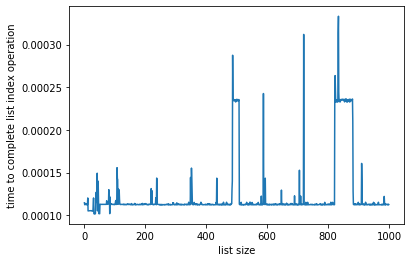

In [1]:
# Ch2 Programming Exercises
# Q1
import timeit
from timeit import Timer
%matplotlib inline
import matplotlib.pyplot as plt

# record time to complete for list index operation
list_index_time = Timer('x.index(0)', 'from __main__ import x')
time_hist = []
for i in range(1,1000,1):
    x  = list(range(i)) 
    time_hist.append(list_index_time.timeit(number=1000)) 

# plot time complexity 
plt.plot(range(1,1000,1), time_hist)
plt.xlabel('list size')
plt.ylabel('time to complete list index operation') 
plt.show()    

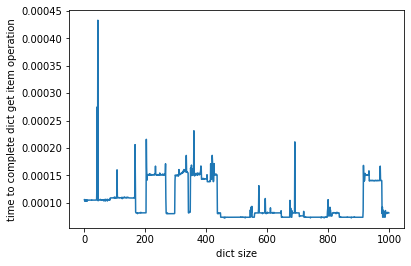

In [2]:
# Q2(a)
# record time to complete for dict get item operation
dict_get_time = Timer('x.get(i)', 'from __main__ import x,i')
time_hist = []
for i in range(1,1000,1):
    x  = {j:None for j in range(i)}
    time_hist.append(dict_get_time.timeit(number=1000)) 

# plot time complexity 
plt.plot(range(1,1000,1), time_hist)
plt.xlabel('dict size')
plt.ylabel('time to complete dict get item operation') 
plt.show()   

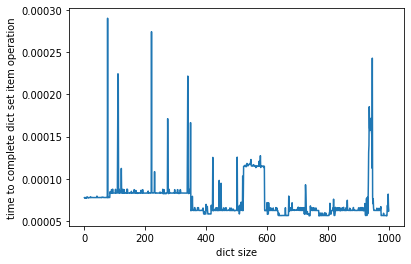

In [3]:
# Q2(b)
# record time to complete for dict set item operation
dict_set_time = Timer('x[i]=1', 'from __main__ import x,i')
time_hist = []
for i in range(1,1000,1):
    x  = {j:None for j in range(i)}
    time_hist.append(dict_set_time.timeit(number=1000)) 

# plot time complexity 
plt.plot(range(1,1000,1), time_hist)
plt.xlabel('dict size')
plt.ylabel('time to complete dict set item operation') 
plt.show()   

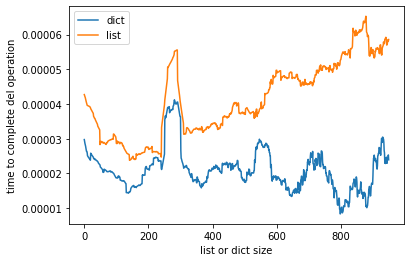

In [4]:
# Q3
# record time to complete for del operation
def del_op(x,k):
    del x[k]

del_time  = Timer('del_op(x.copy(),k)', 'from __main__ import x,k,del_op')
copy_time = Timer('x.copy()', 'from __main__ import x')

k = 0
list_t = []
dict_t = []

for i in range(1,1000,1):
    x = {j:None for j in range(i)}
    dict_t.append(del_time.timeit(number=100)-copy_time.timeit(number=100))
    x = list(range(i))
    list_t.append(del_time.timeit(number=100)-copy_time.timeit(number=100))

# plot time complexity using MA(50) for better visual
n = 50

cumsum, dict_t_ma = [0], []
for i, v in enumerate(dict_t, 1):
    cumsum.append(cumsum[i-1] + v)
    if i >= n:
        moving_avg = (cumsum[i] - cumsum[i-n])/n
        dict_t_ma.append(moving_avg)

cumsum, list_t_ma = [0], []
for i, v in enumerate(list_t, 1):
    cumsum.append(cumsum[i-1] + v)
    if i >= n:
        moving_avg = (cumsum[i] - cumsum[i-n])/n
        list_t_ma.append(moving_avg)
        
plt.plot(dict_t_ma, label='dict') 
plt.plot(list_t_ma, label='list') 
plt.xlabel('list or dict size')
plt.ylabel('time to complete del operation')
plt.legend()
plt.show()

In [5]:
# Q4
# potential typo? ask for linear time complexity,
# but Q5 ask to improve time complexity to log-linear,
# which is worse than linear. 

import random

x1 = [round(random.random(),3) for i in range(random.randint(1,10))]
x2 = x1.copy()
k  = random.randint(1,len(x1))

print('unsorted list:', x1)

length = len(x1)
midpt  = length//2

if k < midpt:
    for j in range(k):
        minv = float('inf')
        for i,v in enumerate(x1):
            if v < minv:
                minv = v
                mini = i
        x1.pop(mini)
    kmin = minv
else:
    for j in range(length,k-1,-1):
        maxv = float('-inf')
        for i,v in enumerate(x1):
            if v > maxv:
                maxv = v
                maxi = i
        x1.pop(maxi)
    kmin = maxv

print(k, '-th smallest # in the list:', kmin)

unsorted list: [0.712, 0.643, 0.903, 0.005, 0.696]
4 -th smallest # in the list: 0.712


In [6]:
# Q5
x2.sort() # time o(nlogn)
print('sorted list:', x2)
print(k, '-th smallest # in the list:', x2[k-1]) 

sorted list: [0.005, 0.643, 0.696, 0.712, 0.903]
4 -th smallest # in the list: 0.712
